# NAME: Vishal Kushwaha

# **TASK 2** 

###  Prediction using Unsupervised ML(Level - Beginner)

### From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

#### Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

#### Load Iris DataSet
#### DATASET LINK:-  https://bit.ly/3kXTdox

In [2]:
from sklearn import datasets
df = datasets.load_iris()
df_data = pd.DataFrame(df.data, columns = df.feature_names)
df_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


#### DATA SET SUCCESSFULLY ADDED

#### CHESK THE SIZE OF  DATASET

In [3]:
df_data.shape

(150, 4)

#### GET DATASET INFORMATION

In [4]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


#### GET COLOUMN NAME

In [5]:
df_data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

## Exploratory Data Analysis(EDA)

### UNIVARIATE ANALYSIS

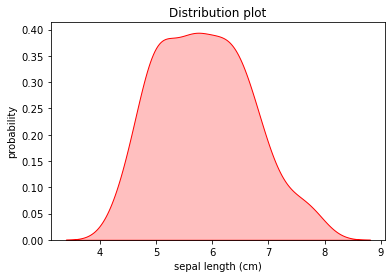

In [6]:
import seaborn as sns
sns.kdeplot(df_data['sepal length (cm)'],shade=True, color="r")
plt.xlabel('sepal length (cm)')
plt.ylabel('probability')
plt.title('Distribution plot')
plt.show()

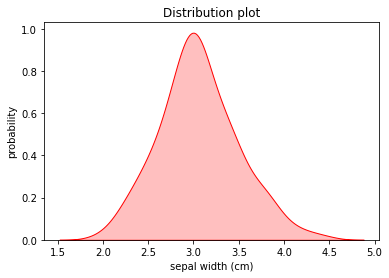

In [7]:
import seaborn as sns
sns.kdeplot(df_data['sepal width (cm)'],shade=True, color="r")
plt.xlabel('sepal width (cm)')
plt.ylabel('probability')
plt.title('Distribution plot')
plt.show()

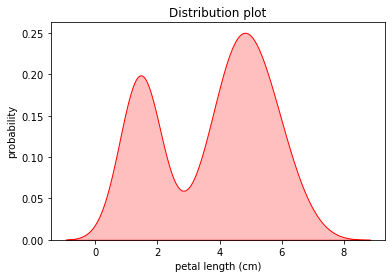

In [8]:
import seaborn as sns
sns.kdeplot(df_data['petal length (cm)'],shade=True, color="r")
plt.xlabel('petal length (cm)')
plt.ylabel('probability')
plt.title('Distribution plot')
plt.show()

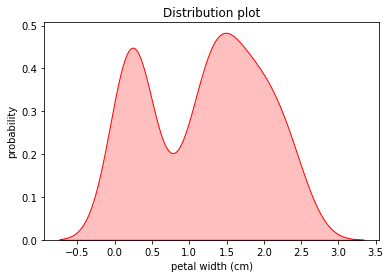

In [9]:
import seaborn as sns
sns.kdeplot(df_data['petal width (cm)'],shade=True, color="r")
plt.xlabel('petal width (cm)')
plt.ylabel('probability')
plt.title('Distribution plot')
plt.show()

### MULTIVARIATE ANALYSIS

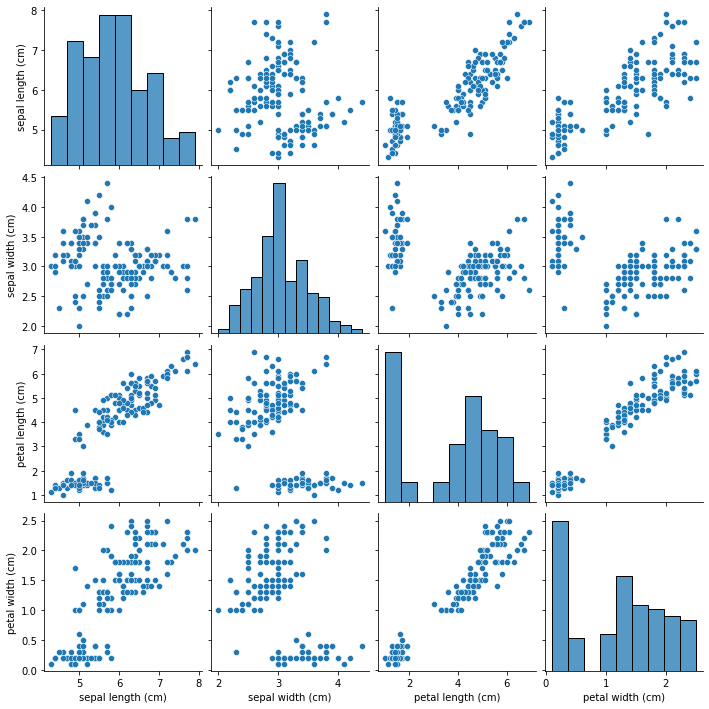

In [10]:
sns.pairplot(df_data)
plt.show()

#### FROM THE PAIRPLOT, IT CAN VISUALlY THAT THEIR IS ATLEAST 2 DIFFERENT CLUSTRES ARE FORMED

## CHECKING OF MULTICOLLINEARITY

In [11]:
import statsmodels.api as sm
Xc = sm.add_constant(df_data)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(Xc.values,i)for i in range(Xc.shape[1])]
pd.DataFrame({'VIF':vif[1:]},index=df_data.columns)

,VIF
sepal length (cm),7.072722
sepal width (cm),2.100872
petal length (cm),31.261498
petal width (cm),16.090175


#### *THERE IS A HIGHLY MULTICOLLINEARITY OCCURED, SO THAT* **PCA** *CAN BE APPLIED*

### DATA PREPRAION:-
    1) STANDARD SCALING
    2) PCA APPLICATION

In [12]:
from sklearn.preprocessing import StandardScaler 
ss= StandardScaler()
from sklearn.decomposition import PCA
pca = PCA()
dfs = ss.fit_transform(df_data)
dfs = pd.DataFrame(dfs)
dfs.columns = df_data.columns
pca.fit(dfs)
pca = PCA(0.95)
df_pca = pca.fit_transform(dfs)
cols = list(dfs.columns)
PCA_df = pd.DataFrame(pca.components_.T,index=cols,columns=['PCA1','PCA2']).reset_index().rename(columns={'index':'Features'})
PCA_df

,Features,PCA1,PCA2
0,sepal length (cm),0.521066,0.377418
1,sepal width (cm),-0.269347,0.923296
2,petal length (cm),0.580413,0.024492
3,petal width (cm),0.564857,0.066942


### FROM THE ABOVE TABLE
    1) PCA1 EXPLAIN 0.521066 VARIATION FOR SEPAL LENGTH,-0.269347 VARIATION FOR SEPAL WIDTH AND SO ON
    2) OUT OF THE TOTAL VARIATION IN THE SEPAL LENGTH 0.521066 EXPLAINED BY PCA1 AND 0.377418 EXPLAINED BY PCA2
    3) PCA1 EXPLAIN 0.580413 VARIATION FOR PETAL LENGTH,0.564857 VARIATION FOR PETAL WIDTH AND SO ON
    4) OUT OF THE TOTAL VARIATION IN THE PETAL LENGTH 0.580413 EXPLAINED BY PCA1 AND 0.024492 EXPLAINED BY PCA2

## K-MEANS CLUSTERING

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
km = KMeans(random_state = 0)
wcss=[]
sil_score=[]
for k in range(2,15):
    km = KMeans(n_clusters = k)
    km.fit(df_pca)
    wcss.append(km.inertia_)
    sil_score.append(silhouette_score(df_pca,km.labels_))
print(wcss,'\n',sil_score)

[197.4038160454129, 115.18647050742707, 89.34762085165663, 66.81480833511748, 57.20074129278283, 47.9883572849095, 39.10634251943561, 32.864965469781254, 28.163246989915102, 25.626311546695238, 22.406532363832156, 20.039585149912803, 17.48969267858087] 
 [0.6145202036230452, 0.511324517646045, 0.44450802349850316, 0.4155559829839715, 0.42761681139703983, 0.4363577769712246, 0.44235032248100226, 0.436125131896477, 0.4462755256527214, 0.43954138767091916, 0.4366496894698023, 0.4450661468913929, 0.4342361843628752]


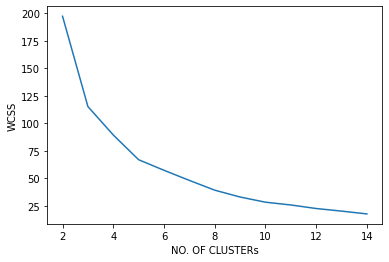

In [14]:
plt.plot(range(2,15),wcss)
plt.xlabel('NO. OF CLUSTERs')
plt.ylabel('WCSS')
plt.show()

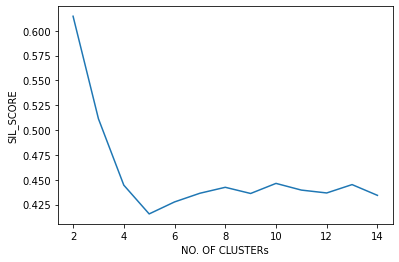

In [15]:
plt.plot(range(2,15),sil_score)
plt.xlabel('NO. OF CLUSTERs')
plt.ylabel('SIL_SCORE')
plt.show()

#### FROM ABOVE TWO GRAPH WE CAN OBSERVE THAT MINIMUM NUMBER OF CLUSTERS IS 3

In [16]:
km = KMeans(n_clusters=3,n_init=15,random_state=0)
km.fit(df_pca)

KMeans(n_clusters=3, n_init=15, random_state=0)

In [17]:
pd.Series(km.labels_).value_counts()

2    53
1    50
0    47
dtype: int64

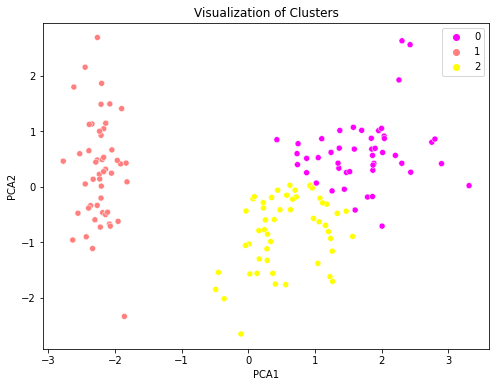

In [18]:
plt.figure(figsize=[8,6])
sns.scatterplot(x=df_pca[:,0],y=df_pca[:,1],hue=km.labels_,palette='spring')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Visualization of Clusters')
plt.show()

#### WE CAN SEE THAT AFTER STANDARD SCALING AND APPLYING OF PCA, 3 CLUSTERS ARE FORMED WHICH CAN SEE ABOVE PLOT GRAPH

In [19]:
pd.DataFrame(km.cluster_centers_)

,0,1
0,1.721037,0.602887
1,-2.224753,0.288927
2,0.572621,-0.807209


#### IN THE CASE OF PCAs , THE CENTROID ARE FAR APART FROM EACHOTHER. THUS, DIFFERENTIATED CLUSTERS

In [20]:
df_data['labels'] = km.labels_
df_data.groupby('labels').mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
labels,,,,
0,6.780851,3.095745,5.510638,1.972340
1,5.006000,3.428000,1.462000,0.246000
2,5.801887,2.673585,4.369811,1.413208


### WITH REGARDS TO CLUSTERS, BELOW ARE SOME OBSERVATIONS:

#### 1)THE SEPAL LENGTH OF FLOWER IN CLUSTER 0 IS LARGEST
#### 2)THE SEPAL WIDTH OF FLOWER IN CLUSTER 2 IS SMALLEST
#### 3)THE PETAL LENGTH OF FLOWER IN CLUSTER 0 IS LARGEST
#### 4)THE PETAL WIDTH OF FLOWER IN CLUSTER 1 IS SMALLEST